In [3]:
import pandas as pd
nodes = pd.read_csv("../outputs/phase1_fast/nodes_cosine_E1_k10.csv", index_col="id_student")
info = pd.read_csv("../data/studentInfo.csv")
merged = nodes.join(info.set_index("id_student"), how="left")
# compute pass rate per community
pass_rate = merged.groupby("community")["final_result"].apply(lambda s: (s=="Pass").mean())
print(pass_rate.sort_values(ascending=False))


community
13    0.774892
24    0.735010
41    0.686275
19    0.682724
6     0.599273
3     0.599160
27    0.592885
22    0.565844
39    0.561404
4     0.554379
31    0.536364
25    0.534211
12    0.530941
15    0.512230
33    0.507463
23    0.503386
42    0.500000
26    0.498008
7     0.489231
30    0.484581
10    0.474654
38    0.467890
8     0.466877
2     0.464431
18    0.460177
40    0.459016
36    0.445312
20    0.435052
21    0.432071
29    0.408696
17    0.395210
35    0.375000
11    0.363636
1     0.307627
9     0.306829
16    0.276204
28    0.275304
37    0.253846
14    0.249084
5     0.212598
34    0.208589
32    0.190265
0     0.000332
Name: final_result, dtype: float64


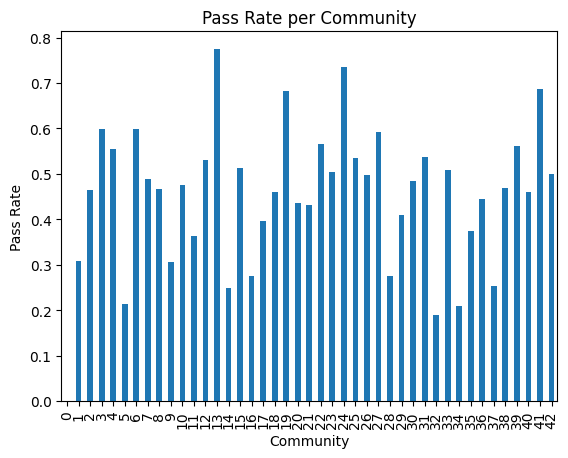

In [4]:

# plot a graph of pass rates per community
import matplotlib.pyplot as plt

pass_rate.plot(kind="bar")
plt.title("Pass Rate per Community")
plt.xlabel("Community")
plt.ylabel("Pass Rate")
plt.show()



In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

OUTPUT_DIR = "outputs/phase1_fast"

# Node statistics
nodes = pd.read_csv(f"../{OUTPUT_DIR}/nodes_cosine_E1_k10.csv", index_col="id_student")

# Graph-level stats
stats = pd.read_csv(f"../{OUTPUT_DIR}/stats_cosine_E1_k10.csv").iloc[0]

# Edge list
edges = pd.read_csv(f"../{OUTPUT_DIR}/edges_cosine_E1_k10.csv")

# Rebuild NetworkX graph if needed
G = nx.from_pandas_edgelist(edges, "u", "v", edge_attr="weight")


In [7]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Density:", nx.density(G))
print("Number of components:", nx.number_connected_components(G))
print("Average degree:", sum(dict(G.degree()).values()) / G.number_of_nodes())


Number of nodes: 26099
Number of edges: 161442
Density: 0.0004740404815279028
Number of components: 4
Average degree: 12.371508486915207


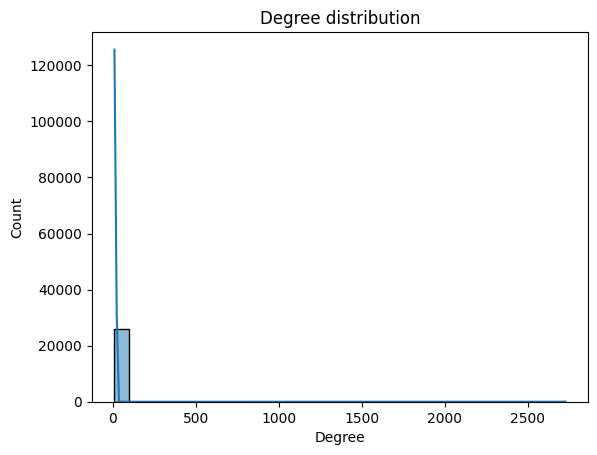

In [8]:
degrees = [d for n, d in G.degree()]
sns.histplot(degrees, bins=30, kde=True)
plt.title("Degree distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()


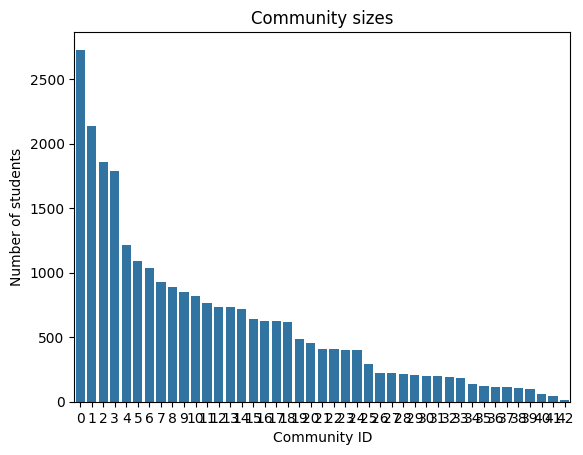

In [9]:
sns.countplot(x="community", data=nodes)
plt.title("Community sizes")
plt.xlabel("Community ID")
plt.ylabel("Number of students")
plt.show()


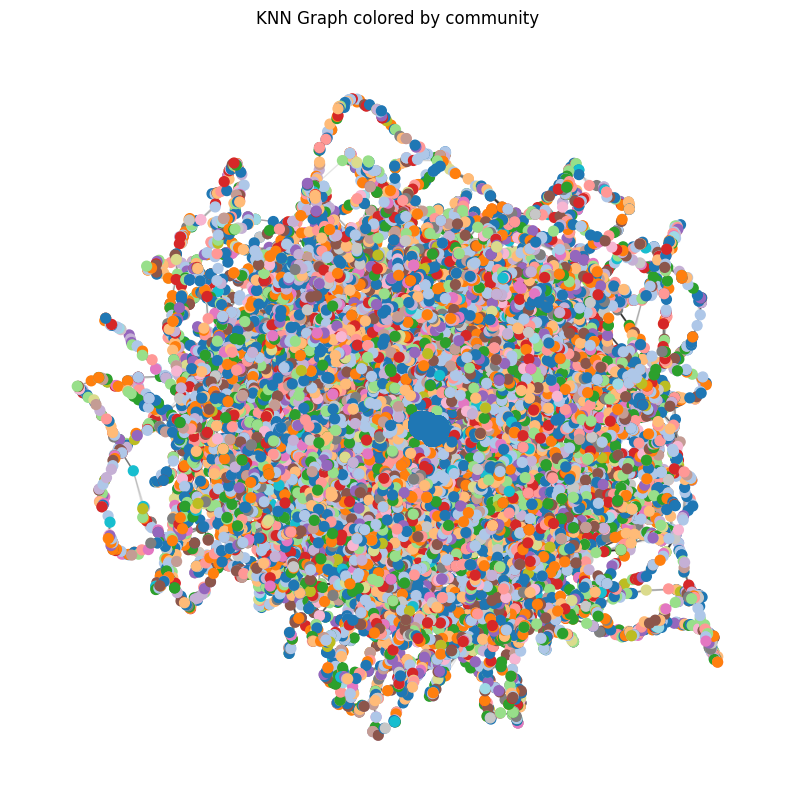

In [11]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, seed=42)  # force-directed layout
nx.draw_networkx_nodes(G, pos, node_size=50, node_color=nodes["community"], cmap=plt.cm.tab20)
nx.draw_networkx_edges(G, pos, alpha=0.1)
plt.title("KNN Graph colored by community")
plt.axis("off")
plt.show()


In [12]:
largest_cc = max(nx.connected_components(G), key=len)
G_lcc = G.subgraph(largest_cc)

print("Largest CC nodes:", G_lcc.number_of_nodes())
print("Largest CC edges:", G_lcc.number_of_edges())


Largest CC nodes: 10665
Largest CC edges: 60012


<Axes: >

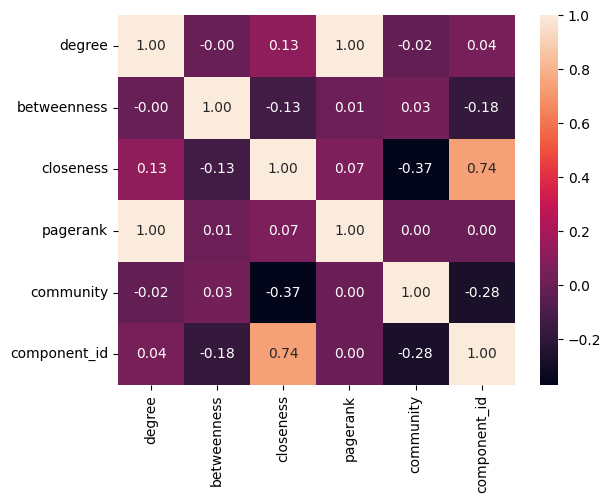

In [13]:
nodes.corr()
sns.heatmap(nodes.corr(), annot=True, fmt=".2f")


In [14]:
nodes.sort_values("pagerank", ascending=False).head(10)


,degree,betweenness,closeness,pagerank,community,component_id
id_student,,,,,,
587285,0.104452,0.000984,0.104452,0.004875,0,3
587912,0.104452,0.000984,0.104452,0.004875,0,3
587179,0.104452,0.000984,0.104452,0.004875,0,3
587308,0.104452,0.000984,0.104452,0.004875,0,3
587310,0.104452,0.000984,0.104452,0.004875,0,3
587478,0.104452,0.000984,0.104452,0.004875,0,3
587585,0.104452,0.000984,0.104452,0.004875,0,3
587777,0.104452,0.000984,0.104452,0.004875,0,3
376117,0.104452,0.000984,0.104452,0.004875,0,3


Chargement et préparation des données...

Poids d'arête maximum : 15
Seuil de filtrage (90e percentile): 14

Réseau créé pour le Module: FFF, Présentation: 2014J
Nombre de nœuds (étudiants actifs): 635
Nombre d'arêtes (connexions fortes): 50661

--- Analyse des Communautés (Comportement d'Interaction vs. Résultat) ---
final_result  Distinction  Fail  Pass  Withdrawn
community                                       
256                   0.0   0.0   1.0        0.0
248                   0.0   0.0   1.0        0.0
135                   0.0   0.0   1.0        0.0
247                   0.0   0.0   1.0        0.0
137                   0.0   0.0   1.0        0.0
...                   ...   ...   ...        ...
129                   1.0   0.0   0.0        0.0
127                   0.0   1.0   0.0        0.0
123                   1.0   0.0   0.0        0.0
116                   0.0   1.0   0.0        0.0
289                   1.0   0.0   0.0        0.0

[290 rows x 4 columns]


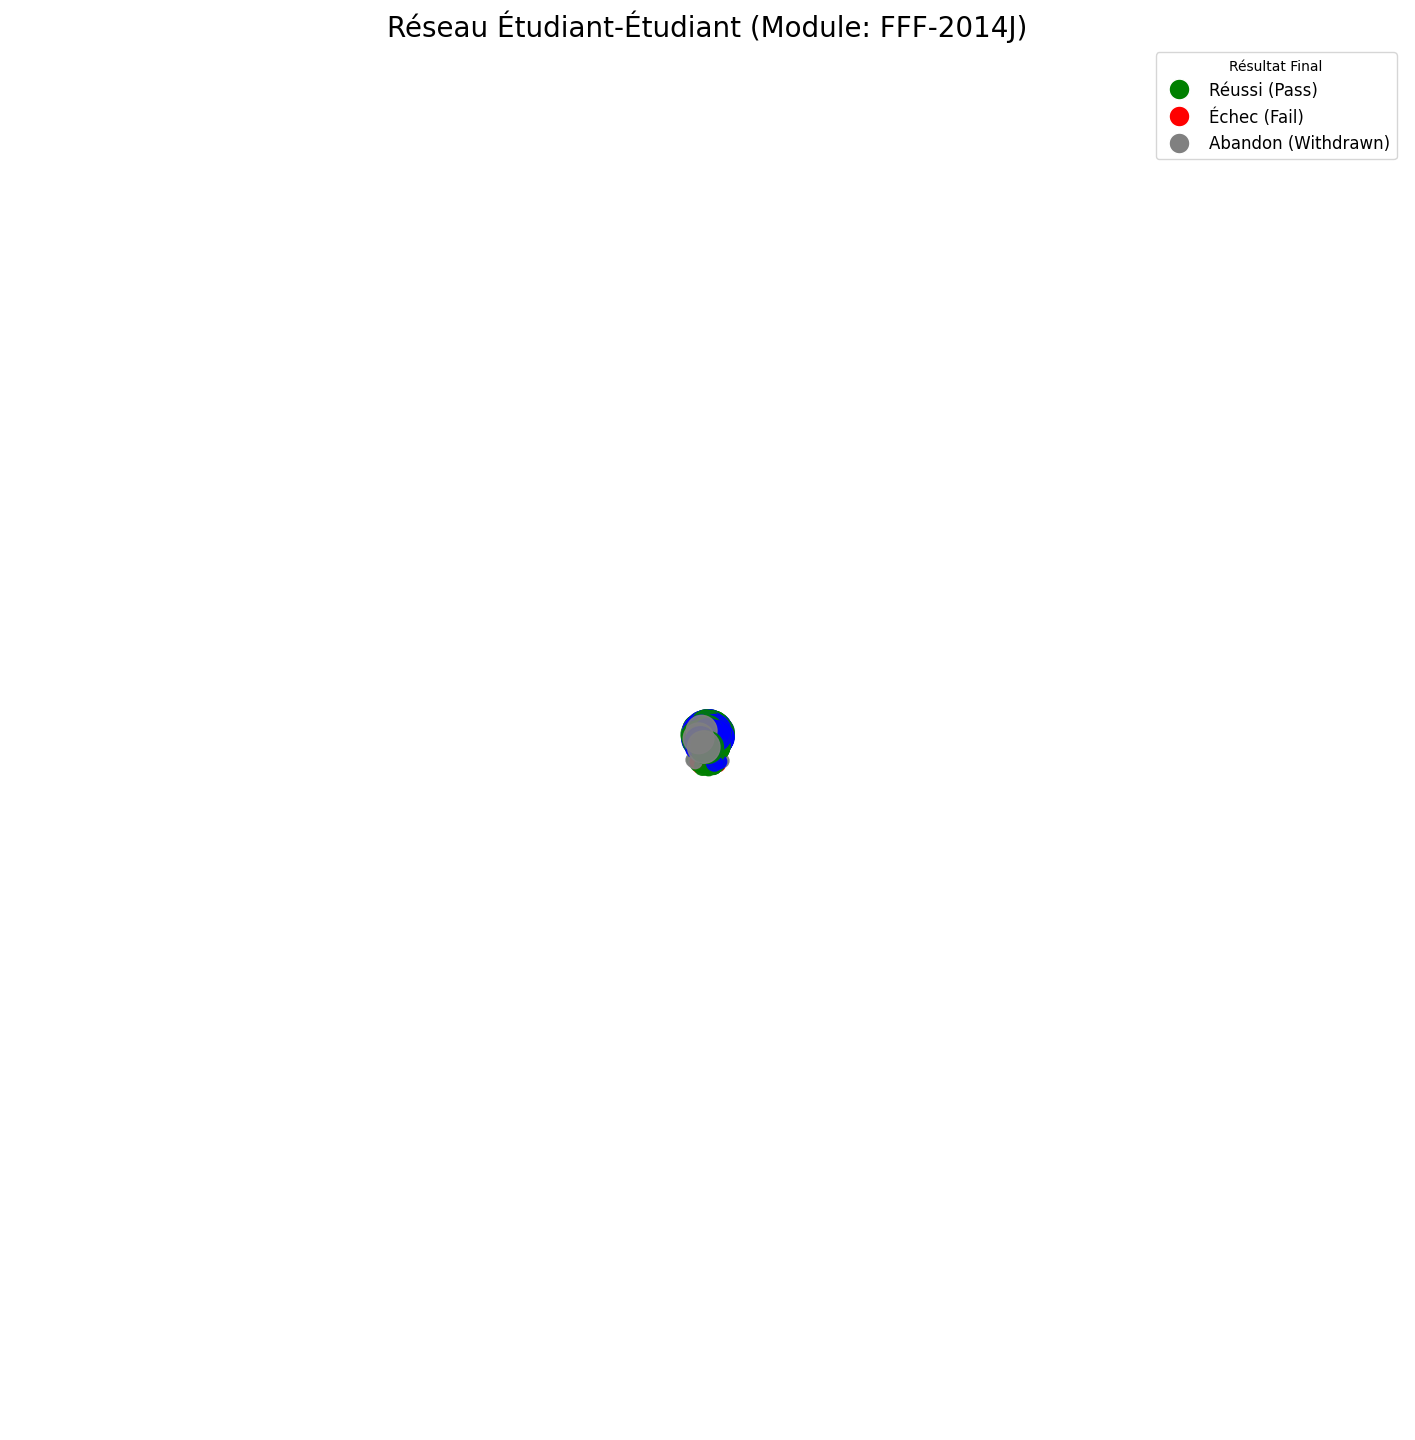

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain 
import warnings
warnings.filterwarnings('ignore') 

# --- (Parties 1 et 2: Chargement, jointure, agrégation et sélection de module inchangées) ---

print("Chargement et préparation des données...")



# Répéter les étapes de chargement et de préparation pour l'autonomie
try:
    df_studentVle = pd.read_csv('../data/studentVle.csv')
    df_vle = pd.read_csv('../data/vle.csv')
    df_info = pd.read_csv('../data/studentInfo.csv')
except FileNotFoundError:
    print("Erreur: Fichiers CSV introuvables.")
    exit()

df_interactions = pd.merge(df_studentVle, df_vle, on=['id_site', 'code_module', 'code_presentation'], how='inner')
most_frequent_module = ('FFF', '2014J') # Utiliser votre module FFF-2014J pour la continuité
MODULE_CODE, PRESENTATION_CODE = most_frequent_module
df_module = df_interactions[
    (df_interactions['code_module'] == MODULE_CODE) & 
    (df_interactions['code_presentation'] == PRESENTATION_CODE)
].copy()
df_agg = df_module.groupby(['id_student', 'activity_type'])['sum_click'].sum().reset_index()

# Filtrage des étudiants actifs (Top 20% des clics) - Conserver pour la clarté
student_clicks = df_agg.groupby('id_student')['sum_click'].sum()
active_students = student_clicks[student_clicks > student_clicks.quantile(0.7)].index 
df_filtered = df_agg[df_agg['id_student'].isin(active_students)]
df_matrix = df_filtered.pivot_table(
    index='id_student', columns='activity_type', values='sum_click', fill_value=0
)

# --- 3. Construction du Réseau Bipartite (inchangée) ---
B = nx.Graph()
students = df_matrix.index.tolist()
activities = df_matrix.columns.tolist()
B.add_nodes_from(students, bipartite=0, label='Student')
B.add_nodes_from(activities, bipartite=1, label='Activity')
for student in students:
    for activity in activities:
        weight = df_matrix.loc[student, activity]
        if weight > 0:
            B.add_edge(student, activity, weight=weight)
            
# Projection en Réseau Unipartite Pondéré (Utilise la fonction corrigée)
G_students = nx.bipartite.weighted_projected_graph(B, nodes=students)

# --- NOUVEAU: Filtrage Dynamique des Arêtes ---

# 1. Extraire tous les poids des arêtes
all_weights = [data['weight'] for u, v, data in G_students.edges(data=True)]

if not all_weights:
    print("\n⚠️ AVERTISSEMENT : Le graphe projeté est vide (0 arête). Le seuil du Top 20% d'étudiants pourrait être trop strict.")
    # On sort sans faire le filtrage si le graphe est déjà vide.
else:
    # 2. Déterminer le seuil (par exemple, le 90e percentile)
    # On ne conserve que les 10% des liens les plus forts
    threshold = pd.Series(all_weights).quantile(0.90) 
    
    print(f"\nPoids d'arête maximum : {max(all_weights):.0f}")
    print(f"Seuil de filtrage (90e percentile): {threshold:.0f}")

    # 3. Supprimer les arêtes dont le poids est inférieur au seuil
    edges_to_remove = [(u, v) for u, v, data in G_students.edges(data=True) if data['weight'] < threshold]
    G_students.remove_edges_from(edges_to_remove)

print(f"\nRéseau créé pour le Module: {MODULE_CODE}, Présentation: {PRESENTATION_CODE}")
print(f"Nombre de nœuds (étudiants actifs): {G_students.number_of_nodes()}")
print(f"Nombre d'arêtes (connexions fortes): {G_students.number_of_edges()}")

# --- (Parties 4 et 5: Analyse et Visualisation) ---
# ... (Le reste du code d'analyse et de visualisation reste inchangé)
# ... Il est crucial de s'assurer que G_students n'est pas vide avant l'analyse.

# Vérification finale avant analyse/viz:
if G_students.number_of_edges() == 0:
    print("❌ Le graphe est toujours vide après le filtrage dynamique. Impossible de réaliser l'analyse de communauté/visualisation.")
else:
    # a) Calcul de la Centralité (Degree Centrality)
    centrality = nx.degree_centrality(G_students)
    df_centrality = pd.DataFrame(list(centrality.items()), columns=['id_student', 'degree_centrality'])
    df_centrality['id_student'] = df_centrality['id_student'].astype(int)

    # b) Détection de communautés 
    partition = community_louvain.best_partition(G_students)
    df_centrality['community'] = df_centrality['id_student'].map(partition)

    # c) Intégration du résultat final 
    df_results = df_info[['id_student', 'final_result']].drop_duplicates()
    df_analysis = pd.merge(df_centrality, df_results, on='id_student', how='left')

    # Résumé des résultats par communauté
    community_summary = df_analysis.groupby('community')['final_result'].value_counts(normalize=True).unstack(fill_value=0)
    print("\n--- Analyse des Communautés (Comportement d'Interaction vs. Résultat) ---")
    print(community_summary.sort_values(by='Pass', ascending=False))
    
    # Visualisation
    color_map = {'Pass': 'green', 'Fail': 'red', 'Withdrawn': 'gray'}
    node_colors = [color_map.get(df_analysis[df_analysis['id_student'] == int(node)]['final_result'].iloc[0], 'blue') 
                   for node in G_students.nodes()]
    node_sizes = [v * 1000 for v in centrality.values()] 

    plt.figure(figsize=(18, 18))
    pos = nx.spring_layout(G_students, k=0.15, iterations=50) 
    nx.draw_networkx_nodes(G_students, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)
    nx.draw_networkx_edges(G_students, pos, alpha=0.3, edge_color='silver')
    plt.title(f"Réseau Étudiant-Étudiant (Module: {MODULE_CODE}-{PRESENTATION_CODE})", fontsize=20)
    plt.legend(handles=[
        plt.Line2D([0], [0], marker='o', color='w', label='Réussi (Pass)', markerfacecolor='green', markersize=15),
        plt.Line2D([0], [0], marker='o', color='w', label='Échec (Fail)', markerfacecolor='red', markersize=15),
        plt.Line2D([0], [0], marker='o', color='w', label='Abandon (Withdrawn)', markerfacecolor='gray', markersize=15),
    ], title='Résultat Final', loc='best', fontsize=12)
    plt.axis('off')
    plt.show()

Données chargées avec succès!
Nombre d'étudiants: 32593
Nombre d'interactions VLE: 10655280
Démarrage de l'analyse réseau OULAD...


--- Création du réseau Étudiants-Modules ---


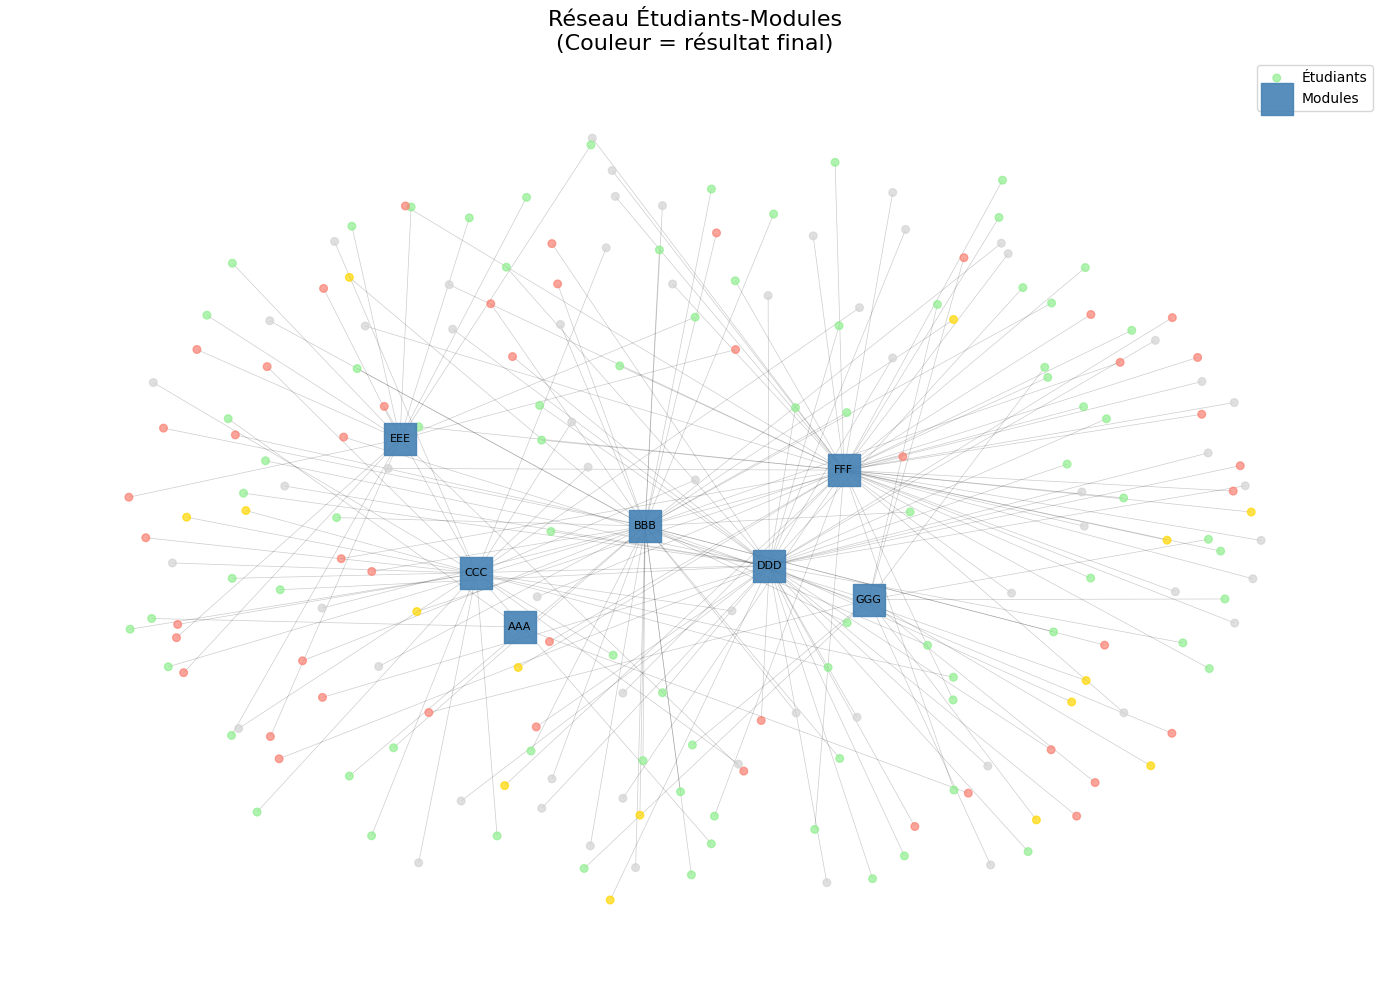


ANALYSE: Réseau Étudiants-Modules
Nombre de nœuds: 207
Nombre d'arêtes: 200
Densité: 0.0094
Nombre de composantes connexes: 7
Taille de la plus grande composante: 54

Top 5 nœuds par centralité de degré:
  FFF: 0.2573
  DDD: 0.2184
  BBB: 0.2087
  CCC: 0.1262
  EEE: 0.0825

Coefficient de clustering moyen: 0.0000

--- Création du réseau Co-occurrence VLE ---


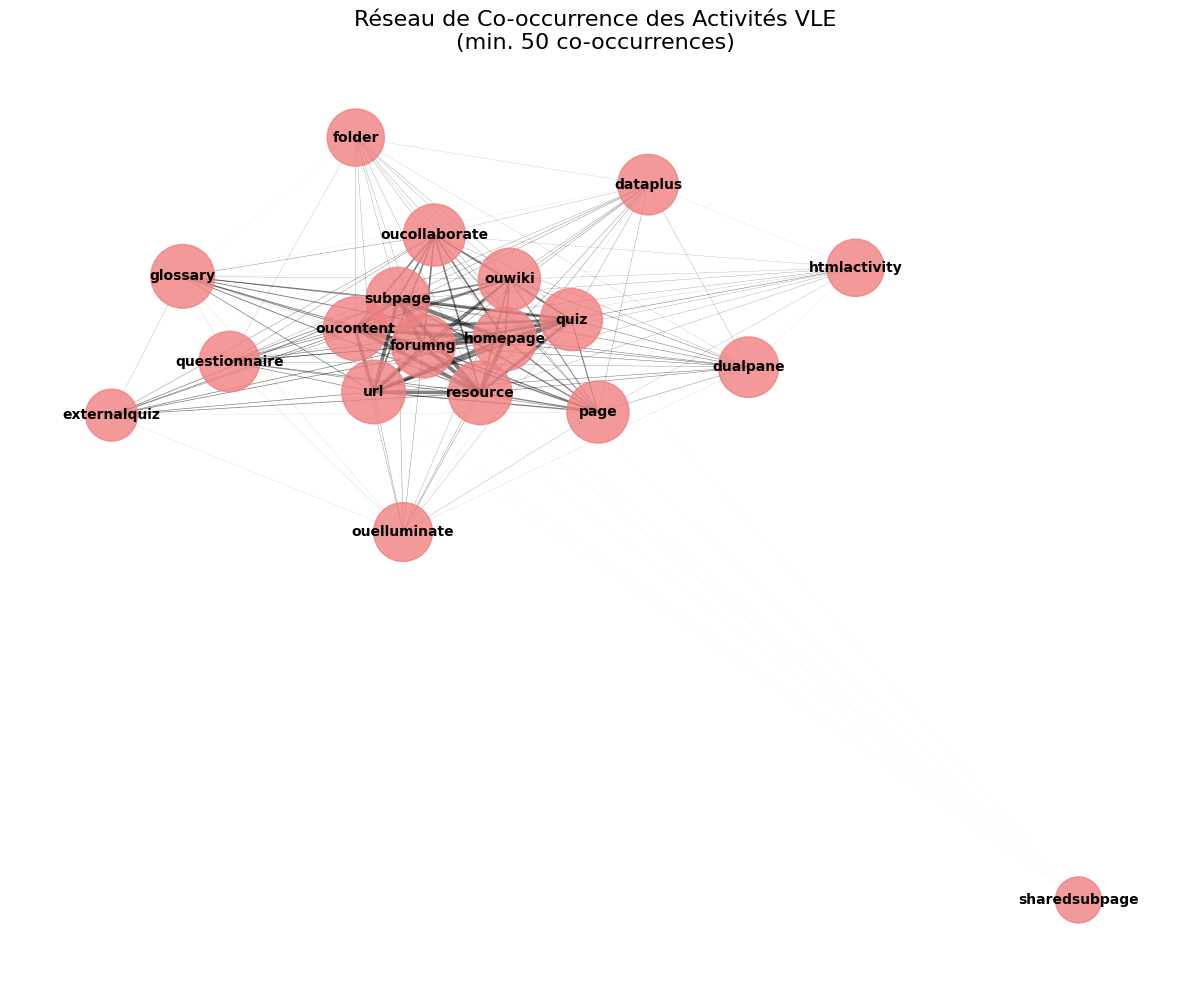


ANALYSE: Réseau Co-occurrence VLE
Nombre de nœuds: 19
Nombre d'arêtes: 152
Densité: 0.8889
Le réseau est connexe
Diamètre: 2
Chemin moyen: 1.11

Top 5 nœuds par centralité de degré:
  forumng: 1.0000
  homepage: 1.0000
  oucontent: 1.0000
  resource: 1.0000
  subpage: 1.0000

Coefficient de clustering moyen: 0.9332

--- Création du réseau Similarité Étudiants ---


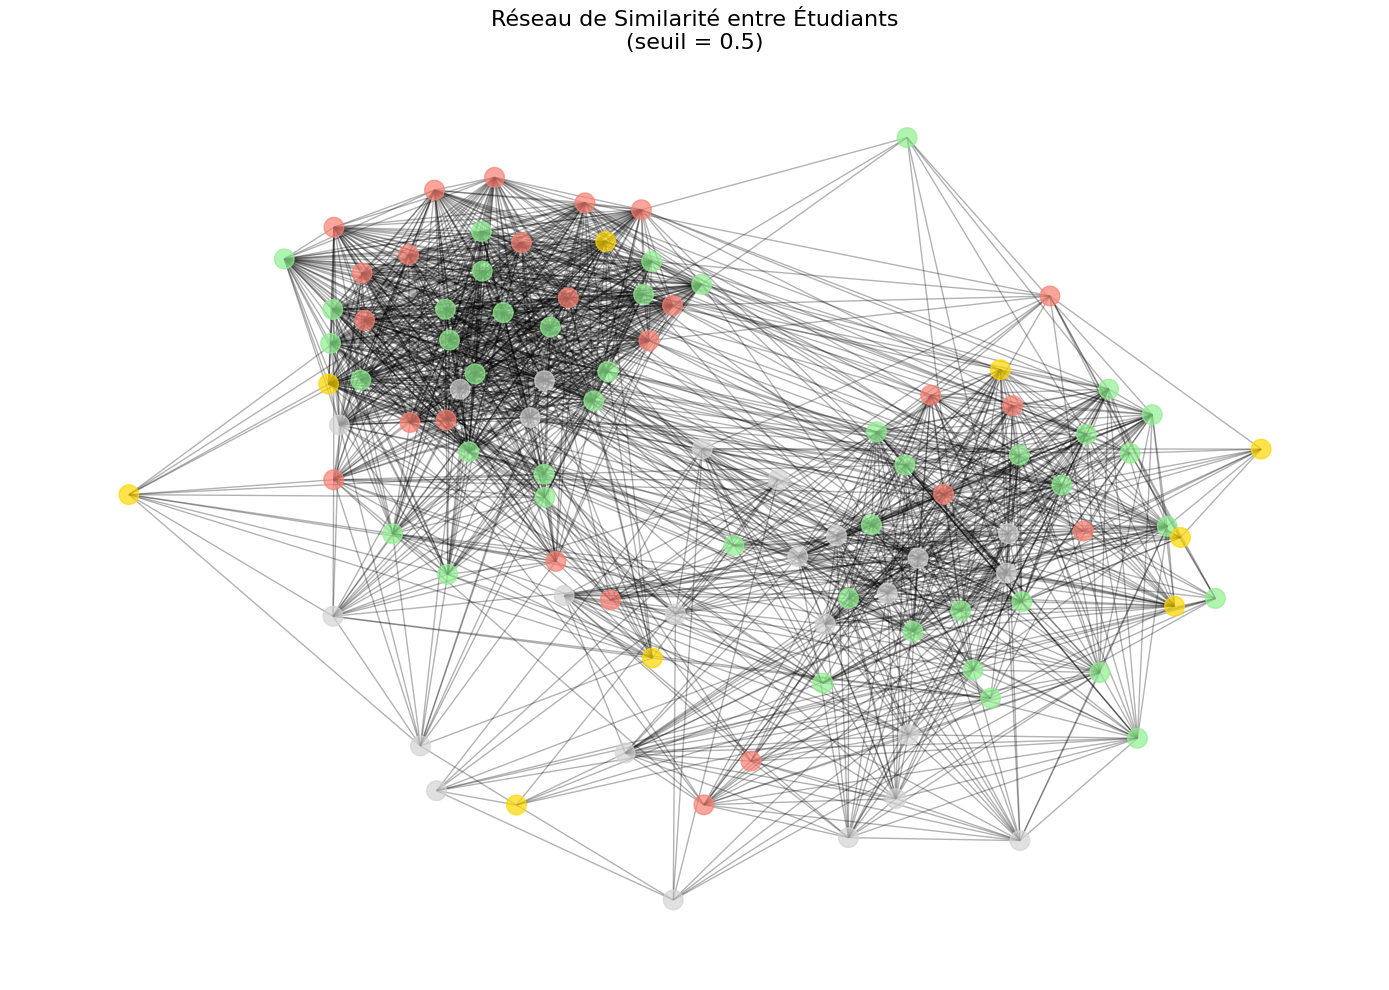


ANALYSE: Réseau Similarité Étudiants
Nombre de nœuds: 100
Nombre d'arêtes: 1548
Densité: 0.3127
Le réseau est connexe
Diamètre: 3
Chemin moyen: 1.78

Top 5 nœuds par centralité de degré:
  598989: 0.4848
  268153: 0.4848
  537193: 0.4646
  628386: 0.4646
  643758: 0.4646

Coefficient de clustering moyen: 0.6657

✅ Analyse terminée! Les graphiques ont été sauvegardés.


In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# ============================================
# 1. CHARGEMENT DES DONNÉES
# ============================================
# Assurez-vous d'avoir téléchargé le dataset OULAD depuis Kaggle
# https://www.kaggle.com/datasets/anlgrbz/student-demographics-online-education-dataoulad

# Charger les fichiers CSV
studentInfo = pd.read_csv('../data/studentInfo.csv')
studentVle = pd.read_csv('../data/studentVle.csv')
vle = pd.read_csv('../data/vle.csv')
studentAssessment = pd.read_csv('../data/studentAssessment.csv')
assessments = pd.read_csv('../data/assessments.csv')

print("Données chargées avec succès!")
print(f"Nombre d'étudiants: {len(studentInfo)}")
print(f"Nombre d'interactions VLE: {len(studentVle)}")

# ============================================
# 2. RÉSEAU 1: ÉTUDIANTS-MODULES
# ============================================
def create_student_module_network():
    """
    Réseau biparti: étudiants connectés aux modules qu'ils suivent
    Coloré par résultat final (Pass/Fail/Withdrawn)
    """
    G = nx.Graph()
    
    # Échantillonner pour visualisation (prendre 200 étudiants)
    sample = studentInfo.sample(n=min(200, len(studentInfo)), random_state=42)
    
    for _, row in sample.iterrows():
        student_id = f"S_{row['id_student']}"
        module = row['code_module']
        result = row['final_result']
        
        # Ajouter les nœuds avec leurs attributs
        G.add_node(student_id, type='student', result=result)
        G.add_node(module, type='module')
        
        # Ajouter l'arête
        G.add_edge(student_id, module)
    
    # Visualisation
    plt.figure(figsize=(14, 10))
    pos = nx.spring_layout(G, k=0.5, iterations=50)
    
    # Séparer les nœuds par type
    students = [n for n, d in G.nodes(data=True) if d.get('type') == 'student']
    modules = [n for n, d in G.nodes(data=True) if d.get('type') == 'module']
    
    # Couleurs selon résultat
    color_map = {'Pass': 'lightgreen', 'Fail': 'salmon', 'Withdrawn': 'lightgray', 'Distinction': 'gold'}
    student_colors = [color_map.get(G.nodes[n].get('result', 'gray'), 'gray') for n in students]
    
    # Dessiner
    nx.draw_networkx_nodes(G, pos, nodelist=students, node_color=student_colors, 
                          node_size=30, alpha=0.7, label='Étudiants')
    nx.draw_networkx_nodes(G, pos, nodelist=modules, node_color='steelblue', 
                          node_size=500, alpha=0.9, node_shape='s', label='Modules')
    nx.draw_networkx_edges(G, pos, alpha=0.2, width=0.5)
    nx.draw_networkx_labels(G, pos, labels={n: n for n in modules}, font_size=8)
    
    plt.title("Réseau Étudiants-Modules\n(Couleur = résultat final)", fontsize=16)
    plt.legend()
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('network_student_module.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return G

# ============================================
# 3. RÉSEAU 2: CO-OCCURRENCE DES ACTIVITÉS VLE
# ============================================
def create_vle_cooccurrence_network(min_cooccurrence=50):
    """
    Réseau où les activités VLE sont connectées si elles sont utilisées
    par les mêmes étudiants dans le même module
    """
    # Fusionner studentVle avec vle pour avoir les types d'activités
    df = studentVle.merge(vle, on=['id_site', 'code_module', 'code_presentation'])
    
    # Créer des paires d'activités par étudiant-module
    df['student_module'] = df['id_student'].astype(str) + '_' + df['code_module']
    
    # Compter les co-occurrences
    from itertools import combinations
    cooccurrences = Counter()
    
    for sm in df['student_module'].unique():
        activities = df[df['student_module'] == sm]['activity_type'].unique()
        for pair in combinations(sorted(activities), 2):
            cooccurrences[pair] += 1
    
    # Créer le graphe
    G = nx.Graph()
    
    for (act1, act2), count in cooccurrences.items():
        if count >= min_cooccurrence:
            G.add_edge(act1, act2, weight=count)
    
    # Visualisation
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G, k=1, iterations=50)
    
    # Taille des nœuds proportionnelle au degré
    node_sizes = [300 + G.degree(n) * 100 for n in G.nodes()]
    
    # Épaisseur des arêtes proportionnelle au poids
    edges = G.edges()
    weights = [G[u][v]['weight'] for u, v in edges]
    max_weight = max(weights) if weights else 1
    edge_widths = [3 * (w / max_weight) for w in weights]
    
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightcoral', alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    
    plt.title(f"Réseau de Co-occurrence des Activités VLE\n(min. {min_cooccurrence} co-occurrences)", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('network_vle_cooccurrence.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return G

# ============================================
# 4. RÉSEAU 3: ÉTUDIANTS SIMILAIRES
# ============================================
def create_student_similarity_network(sample_size=100, similarity_threshold=0.5):
    """
    Réseau où les étudiants sont connectés s'ils ont des profils similaires
    (même région, même niveau d'études, même résultat)
    """
    # Échantillonner
    sample = studentInfo.sample(n=min(sample_size, len(studentInfo)), random_state=42)
    
    G = nx.Graph()
    
    # Ajouter les nœuds
    for _, row in sample.iterrows():
        G.add_node(row['id_student'], 
                  region=row['region'],
                  highest_education=row['highest_education'],
                  result=row['final_result'],
                  age_band=row['age_band'])
    
    # Calculer similarité et ajouter arêtes
    students = list(G.nodes())
    for i, s1 in enumerate(students):
        for s2 in students[i+1:]:
            similarity = 0
            attrs1 = G.nodes[s1]
            attrs2 = G.nodes[s2]
            
            # Même région
            if attrs1['region'] == attrs2['region']:
                similarity += 0.3
            # Même niveau d'études
            if attrs1['highest_education'] == attrs2['highest_education']:
                similarity += 0.3
            # Même résultat
            if attrs1['result'] == attrs2['result']:
                similarity += 0.2
            # Même tranche d'âge
            if attrs1['age_band'] == attrs2['age_band']:
                similarity += 0.2
            
            if similarity >= similarity_threshold:
                G.add_edge(s1, s2, weight=similarity)
    
    # Visualisation
    plt.figure(figsize=(14, 10))
    pos = nx.spring_layout(G, k=0.8, iterations=50)
    
    # Couleur par résultat
    color_map = {'Pass': 'lightgreen', 'Fail': 'salmon', 'Withdrawn': 'lightgray', 'Distinction': 'gold'}
    node_colors = [color_map.get(G.nodes[n]['result'], 'gray') for n in G.nodes()]
    
    # Filtrer les nœuds isolés
    connected_nodes = [n for n in G.nodes() if G.degree(n) > 0]
    
    if connected_nodes:
        H = G.subgraph(connected_nodes)
        pos_filtered = {k: v for k, v in pos.items() if k in connected_nodes}
        node_colors_filtered = [color_map.get(H.nodes[n]['result'], 'gray') for n in H.nodes()]
        
        nx.draw_networkx_nodes(H, pos_filtered, node_color=node_colors_filtered, 
                              node_size=200, alpha=0.7)
        nx.draw_networkx_edges(H, pos_filtered, alpha=0.3, width=1)
        
        plt.title(f"Réseau de Similarité entre Étudiants\n(seuil = {similarity_threshold})", fontsize=16)
        plt.axis('off')
        plt.tight_layout()
        plt.savefig('network_student_similarity.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    return G

# ============================================
# 5. ANALYSE DES MÉTRIQUES
# ============================================
def analyze_network(G, network_name):
    """
    Calcule et affiche les métriques importantes d'un réseau
    """
    print(f"\n{'='*50}")
    print(f"ANALYSE: {network_name}")
    print(f"{'='*50}")
    
    print(f"Nombre de nœuds: {G.number_of_nodes()}")
    print(f"Nombre d'arêtes: {G.number_of_edges()}")
    print(f"Densité: {nx.density(G):.4f}")
    
    if G.number_of_edges() > 0:
        # Composantes connexes
        if nx.is_connected(G):
            print("Le réseau est connexe")
            print(f"Diamètre: {nx.diameter(G)}")
            print(f"Chemin moyen: {nx.average_shortest_path_length(G):.2f}")
        else:
            components = list(nx.connected_components(G))
            print(f"Nombre de composantes connexes: {len(components)}")
            largest = max(components, key=len)
            print(f"Taille de la plus grande composante: {len(largest)}")
        
        # Centralité
        degree_cent = nx.degree_centrality(G)
        top_nodes = sorted(degree_cent.items(), key=lambda x: x[1], reverse=True)[:5]
        print(f"\nTop 5 nœuds par centralité de degré:")
        for node, cent in top_nodes:
            print(f"  {node}: {cent:.4f}")
        
        # Coefficient de clustering
        print(f"\nCoefficient de clustering moyen: {nx.average_clustering(G):.4f}")

# ============================================
# 6. EXÉCUTION
# ============================================
if __name__ == "__main__":
    print("Démarrage de l'analyse réseau OULAD...\n")
    
    # Créer les réseaux
    print("\n--- Création du réseau Étudiants-Modules ---")
    G1 = create_student_module_network()
    analyze_network(G1, "Réseau Étudiants-Modules")
    
    print("\n--- Création du réseau Co-occurrence VLE ---")
    G2 = create_vle_cooccurrence_network(min_cooccurrence=50)
    analyze_network(G2, "Réseau Co-occurrence VLE")
    
    print("\n--- Création du réseau Similarité Étudiants ---")
    G3 = create_student_similarity_network(sample_size=100, similarity_threshold=0.5)
    analyze_network(G3, "Réseau Similarité Étudiants")
    
    print("\n✅ Analyse terminée! Les graphiques ont été sauvegardés.")